# Project Part 2: Benchmark and Optimization

In this milestone you will provide a report which includes the results of your benchmark and optimization.  Your report will include a performance benchmark on a single core and then a description of what you did to speed up the code and a graph of how much improvement you made over the benchmark.  Your final report should include the following:

- Project Title
- Motivating Image
- Abstract
- Methodology
- Timing Results
- Concluding Discussion and Future Work
- References


To help you out your instructor has provided the following template


---- START TEMPLATE ----

# Part 2 - Simulating March Madness

By "Jonathan Dela Cruz"

&#9989; Replace the following with a picture that "defines" your project.  This could be software logo, an expected outcome of your project, or a graphical representation of the research area. Again, it is okay to use the picture from the proposal but it is also good to come up with a new unique picture.  

<img src="https://a.espncdn.com/photo/2025/0316/2025_ncaam_bracket_filled_3x2.jpg" />

Image from: https://a.espncdn.com/photo/2025/0316/2025_ncaam_bracket_filled_3x2.jpg

---
# Abstract

&#9989;  Provide a short paragraph about the software and scientific/engineering domain you cover in your project (research area, sports, economics, etc). Explain why you picked this domain (i.e. what is your motivation). Explain how computation is used in this domain. Give a short description of what you did and a summary of results.  


**For my project, I wanted to take team statistics from all of the March Madness tournament teams from previous years, train a model to try and predict the outcome of each game, and simulate an entire tournament with our given model to predict winners. With March Madness just recently coming to an end, I thought it would've been cool to see if we can get a fast simulation of the tournament games while trying to accurately predict the outcomes. With the new rise in data and analytics in sports, everyone is trying to get ahead of the game and adapt new strategies to give themselves the best shot at winning. While this project isn't necessarily catered to specific game strategies, everyone during March tries to get the perfect bracket. I wanted to investigate any trends between regular season statistics and postseason success. Using the HPCC to run multiple simulations was extremely useful in obtaining relevant results.** 

---
# Methodology

&#9989;  Provide a more detailed description about what you did for this project.  Include detailed instructions needed to reprodue the project.  These instructions should be detailed enough for a future student to be able to read the report, reproduce your results and pick up where you left off. 

- **Manipulating Data:** before anything, I took the dataset and mapped values corresponding to postseason success for each team. I then identified which variables had the largest effect on postseason success by using their correlation values. I took some of the top metrics that appeared to have the largest impact on winning and used them as input features for our model
  
- **Creating our Dataframe:** before building our neural network model, I had to create functions that went year by year in our dataset and created our matchups for each round based off seeding and region. Our new dataframe would have our two teams going head to head and their respective team statistics accumulated during the regular season. I would then have to create a winner column that would correctly identify the winner. Since each round has a different amount of teams, I had to create a function for each round of the tournament. After making a dataframe for each round of the tournament, I combined all of them together to include all of the matchups of the tournament in one dataset.
  
- **Building our Model:** using PyTorch, I was able to build a neural network model that took in each team's statistics and compared theirs to their opponent's, with the hopes of predicting the correct winner. I trained the model on our entire matchup dataset from 2013-2023 and tested it on the 2024 March Madness tournament team dataset. You can interpret the results from the testing and modify any code in your model to fine tune your predictions.
  
- **Running our Simulation:** to run our simulation, I used this year's college basketball data to try and predict the tournament. So using our model, I allowed the model to predict the winner, but I added some random noise into the equation to add some randomness (since it is March Madness). From there, I evaluated our model with noise and saw who won each matchup.

---
# Timing Results

&#9989;  Show the results of a baseline experiment on a single core and after optimization.  Also include a graph of the results. 


&#9989;  Provide the results of a benchmark or scaling study for your project.  Make sure you include a description of the hardware that was used and graph the results.  Make sure you include detailed descriptions about the hardware that was used.  Graphs alone are not sufficient, explain the graphs. Did they meet expectations?  Was there any anomalies?

**Hardware: 2020 M1 Chip MacBook Air, 8 GB Memory, macOS Ventura 13.2**

- **Round of 64 Simulation**
 - 1000 Simulations 
   - **Serial:** ~12s
   - **Parallel:** ~8s
 - 2500 Simulations
   - **Serial:** ~30s
   - **Parallel:** ~9s
 - 10000 Simulations
   - **Serial:** ~75s
   - **Parallel:** ~13s
 - 25000 Simulations
   - **Serial:** ~150s (2.5 minutes)
   - **Parallel:** ~21s
 - 100000 Simulations
   - **Serial:** ~540s (9 minutes)
   - **Parallel:** ~60s

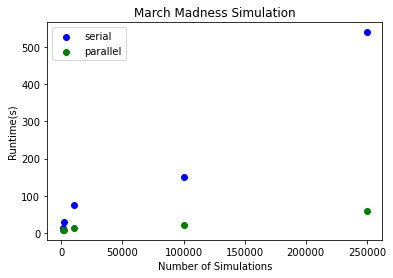

In [8]:
simulations = [1000, 2500, 10000, 100000, 250000]
serial = [12, 30, 75, 150, 540]
parallel = [8, 9, 13, 21, 60]

import matplotlib.pyplot as plt
plt.scatter(simulations, serial, color="blue", label="serial")
plt.scatter(simulations, parallel, color="green", label="parallel")
plt.title("March Madness Simulation")
plt.xlabel("Number of Simulations")
plt.ylabel("Runtime(s)")
plt.legend()

---
# Concluding Discussion and Future Work

&#9989;  Give another short description of the project and your final results.  Use this to talk about what you learned in this project.  Include what you found interesting and what would be a next step.  

**My takeaway from the project was the power of parallelizing and using your resources efficiently. While I was hoping to get more answers about predicting March Madness, what I ended up taking away the most was how powerful using different parallelization techniques and softwares can be to solve problems. Running a whole complex tournament simulation multiple times was extremely achievable through the use of the HPCC. Going forward, I would like to add different input features to see if I could tweak output results. I would also like to explore running each simulation independent of each other, rather than running it all at once and noting the result.**

---
# References

&#9989;  Include links to websites and resources used in this project.  

- https://pytorch.org/
- https://www.ncaa.com/sports/basketball-men/d1
- https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download

---- END TEMPLATE ----

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----